Text(0.5, 1.0, 'Stock Prices Over Time for Major EV Manufacturers')

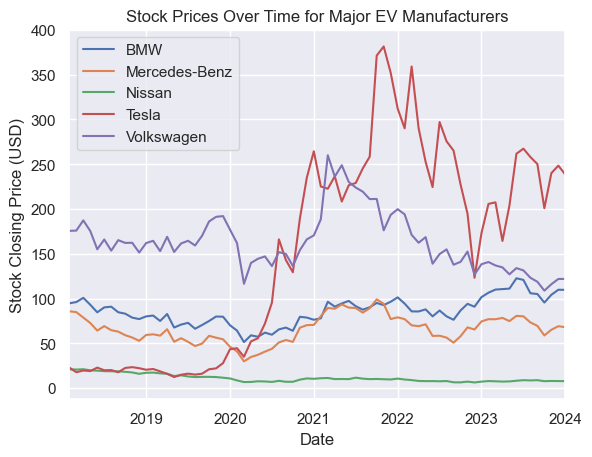

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#EUR to USD Conversion: 1.09

ts = pd.read_csv("data/stock_prices/BMW.DE-2.csv", parse_dates = True, index_col = "Date")
ts['Close'] = ts['Close'].apply(lambda num: num * 1.09)
ts.resample("M").mean()['Close'].plot(label="BMW")

ts2 = pd.read_csv("data/stock_prices/MBGAF.csv", parse_dates = True, index_col = "Date")
ts2.resample("M").mean()['Close'].plot(label="Mercedes-Benz")

ts3 = pd.read_csv("data/stock_prices/NSANY.csv", parse_dates = True, index_col = "Date")
ts3.resample("M").mean()['Close'].plot(label="Nissan")

ts4 = pd.read_csv("data/stock_prices/TSLA.csv", parse_dates = True, index_col = "Date")
ts4.resample("M").mean()['Close'].plot(label="Tesla")

ts5 = pd.read_csv("data/stock_prices/VOW3.DE.csv", parse_dates = True, index_col = "Date")
ts5['Close'] = ts5['Close'].apply(lambda num: num * 1.09)
ts5.resample("M").mean()['Close'].plot(label="Volkswagen")

plt.xlabel("Date")
plt.ylabel("Stock Closing Price (USD)")
plt.legend(loc="upper left")
plt.title("Stock Prices Over Time for Major EV Manufacturers")


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

df = pd.read_csv("data/Electric Car Sales by Model in USA-1.csv")
makes = list(df['Make'])
# for i in range(10):
#     row = pd.Series(df.iloc[i, 1:])
#     row = row.fillna(0)
#     row = pd.to_numeric(row)
#     row = row.apply(lambda row: int(row))
#     row.plot(label=makes[i])
# plt.legend(loc = "upper left")
# plt.xticks(rotation=-45)
# plt.ylabel("Total Cars Sold")
# plt.xlabel("Month")
df

,Make,January 2012,Feb 2012,mars-12,Apr 2012,May 2012,juin-12,juil-12,Aug 2012,sept-12,...,mars-19,Apr 2019,May 2019,juin-19,juil-19,Aug 2019,sept-19,oct-19,nov-19,Dec 2019
0,Chevrolet,603.0,1626.0,3915.0,5377.0,7057.0,8817.0,10666.0,13497.0,16348.0,...,146667.0,147072.0,147480,147813,148063,148337,148687,148757,148907,149057
1,Toyota,0.0,21.0,912.0,2566.0,3652.0,4347.0,5035.0,6082.0,7734.0,...,42345.0,42345.0,42345,42345,42345,42345,42345,42345,42345,42345
2,Nissan,676.0,1154.0,1733.0,2103.0,2613.0,3148.0,3543.0,4228.0,5212.0,...,122534.0,123485.0,124701,125857,126795,129120,128960,129847,130987,132214
3,Ford,2.0,2.0,2.0,2.0,8.0,97.0,135.0,169.0,228.0,...,9242.0,9242.0,9242,9242,9242,9242,9242,9242,9242,9242
4,Mitsubishi,36.0,80.0,136.0,215.0,300.0,333.0,366.0,403.0,439.0,...,2028.0,2028.0,2028,2028,2028,2028,2028,2028,2028,2028
5,Tesla,0.0,NaN,NaN,NaN,NaN,12.0,31.0,74.0,160.0,...,147517.0,148342.0,149367,151117,152092,153142,154242,154992,156492,157992
6,Ford,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42231.0,42231.0,42231,42231,42231,42231,42231,42231,42231,42231
7,Toyota,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,...,2472.0,2472.0,2472,2472,2472,2472,2472,2472,2472,2472
8,Honda,0.0,NaN,NaN,NaN,NaN,NaN,7.0,16.0,32.0,...,1069.0,1069.0,1069,1069,1069,1069,1069,1069,1069,1069


IndexError: single positional indexer is out-of-bounds

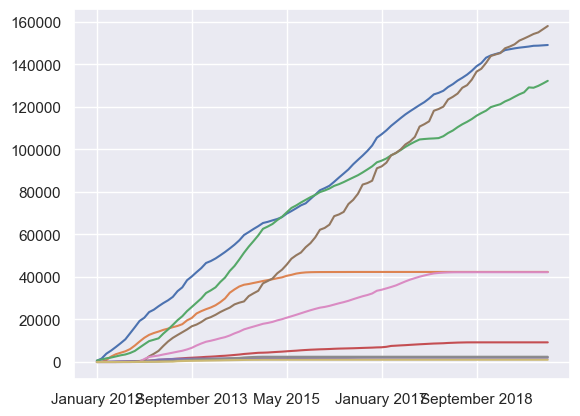

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

df = pd.read_csv("data/Electric Car Sales by Model in USA-1.csv")
df.fillna(0)
makes = list(df['Make'])
for i in range(10):
    row = pd.Series(df.iloc[i, 1:])
    row = row.fillna(0)
    row = pd.to_numeric(row)
    row = row.apply(lambda row: int(row))
    row.plot(label=makes[i])
plt.legend(loc = "upper left")
plt.xticks(rotation=-45)
plt.ylabel("Total Cars Sold")
plt.xlabel("Month")
df

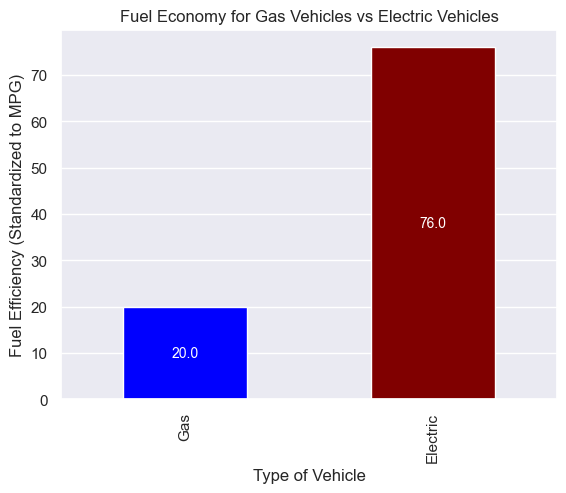

,Type,Efficiency
0,Gas,19.996818
1,Electric,75.992366


In [42]:
df1 = pd.read_csv('data/ev_specs.csv')
df2 = pd.read_csv('data/stimulus/gas_specs.csv')
# df3 = df1.groupby("Category")['Alternative Fuel Economy (Combined)'].mean()
# df4 = df2.groupby("Regulatory Class")['Real-World MPG'].mean()

avg_electric = df1['Alternative Fuel Economy Combined'].mean()
avg_gas = df2['Real-World MPG'].mean()

df3 = pd.DataFrame()
df3['Type'] = pd.Series(["Gas", "Electric"])
df3['Efficiency'] = pd.Series([avg_gas, avg_electric])

plot = df3.plot.bar(x="Type", y="Efficiency", color = ['blue', 'maroon'], legend=False)
import math
for index, value in enumerate(df3['Efficiency'].round()):
    plot.text(index, value / 2, str(value), ha='center', va='center', fontsize=10, color='white')

plt.grid(axis="x")
plt.xlabel("Type of Vehicle")
plt.ylabel("Fuel Efficiency (Standardized to MPG)")
plt.title("Fuel Economy for Gas Vehicles vs Electric Vehicles")

plt.show()
display(df3)

In [ ]:
"""
stuff i used:
    stimulus - us national environmental agency blah blah
    stock prices - yahoo finance
    
"""